In [1]:
import numpy as np
from sklearn import datasets
import theano
import theano.tensor as T
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

theano.config.floatX = 'float32'

%matplotlib inline

Couldn't import dot_parser, loading of dot files will not be possible.


/Users/philippgross/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


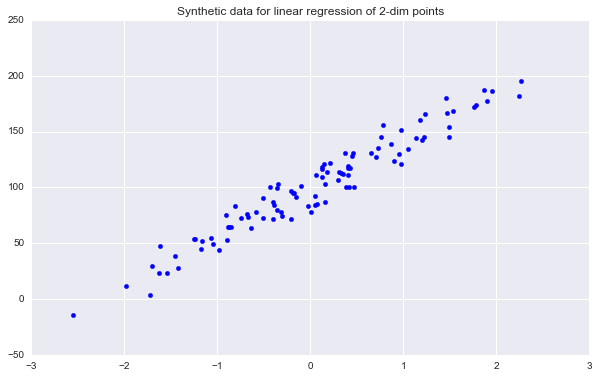

In [2]:
# Create data
n_samples = 100
n_features = 1
n_out_dim = 1
true_bias = 100
train_X, train_y, true_coef = datasets.make_regression(n_samples=n_samples,
                                                  n_features=n_features, 
                                                  n_targets=n_out_dim,
                                                  n_informative=1,
                                                  noise=10,
                                                  bias=true_bias,
                                                  coef=True,
                                                  random_state=0)
# convert array to 1-dim matrix
train_y = train_y.reshape(n_samples,1)

# plot data
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Synthetic data for linear regression of 2-dim points')
ax.scatter(train_X, train_y, color='blue')
plt.show()

In [3]:
# Define model
X = theano.shared(train_X.astype('float32'))
y = theano.shared(train_y.astype('float32'))

a = theano.shared(np.random.randn(n_features, n_out_dim).astype('float32'), name='a')
b = theano.shared(np.zeros(n_out_dim).astype('float32'), name='b')

y_hat = X.dot(a) + b
loss = T.mean(T.sqr(y-y_hat))

In [4]:
# Setup gradient descent
da = T.grad(loss, a)
db = T.grad(loss, b)

epsilon = np.float32(0.01)
gradient_step = theano.function([], 
                                updates=((a, a - epsilon*da),
                                         (b, b - epsilon*db)))

# define functions in order to access shared variables
f_loss = theano.function([], loss)
f_y_hat = theano.function([], y_hat)

In [5]:
# build model
n_epochs = 500
import timeit
for i in xrange(n_epochs):
    gradient_step()
    if i % 100 == 0:
        print i, 'loss=',f_loss()

0 loss= 11680.1289062
100 loss= 285.185302734
200 loss= 116.826019287
300 loss= 114.215118408
400 loss= 114.172233582


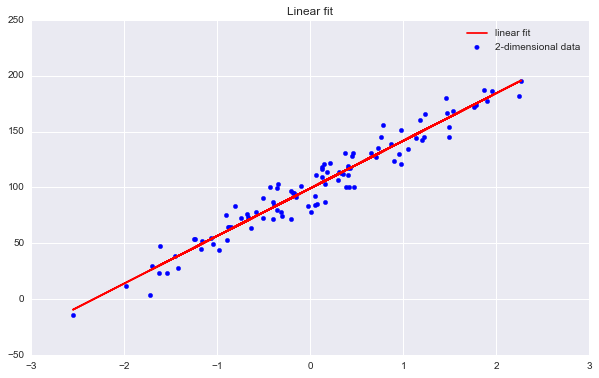

In [6]:
# plot output
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Linear fit')
ax.scatter(train_X, train_y,  color='b', label='2-dimensional data')
ax.plot(train_X, f_y_hat(), color='r', label='linear fit')
ax.legend()
plt.show()

In [7]:
# Compare learned parameters a, b with those used for data generation
f_a = theano.function([], a)
f_b = theano.function([], b)
print 'Model coefficients: a={}, b={}'.format(f_a()[0][0], f_b()[0])
print 'True coefficients:  a={}, b={}'.format(true_coef, true_bias)

Model coefficients: a=42.6201553345, b=99.1820144653
True coefficients:  a=42.3855048558, b=100
